In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
data = pd.read_excel('crop_csv_file.xlsx')

In [4]:
data =  data[:2000]
data

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
1995,Andhra Pradesh,EAST GODAVARI,2002,Whole Year,Bhindi,34,55,62,717.0,13947.0
1996,Andhra Pradesh,EAST GODAVARI,2002,Whole Year,Bottle Gourd,35,50,59,44.0,0.0
1997,Andhra Pradesh,EAST GODAVARI,2002,Whole Year,Brinjal,25,55,55,1889.0,21378.0
1998,Andhra Pradesh,EAST GODAVARI,2002,Whole Year,Cabbage,36,35,45,116.0,0.0


In [5]:
data["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh'], dtype=object)

In [6]:
data["District_Name"].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     2000 non-null   object 
 1   District_Name  2000 non-null   object 
 2   Crop_Year      2000 non-null   int64  
 3   Season         2000 non-null   object 
 4   Crop           2000 non-null   object 
 5   Temperature    2000 non-null   int64  
 6   humidity       2000 non-null   int64  
 7   soil moisture  2000 non-null   int64  
 8    area          2000 non-null   float64
 9   Production     1987 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 156.4+ KB


In [8]:
#handling missing data
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     1987 non-null   object 
 1   District_Name  1987 non-null   object 
 2   Crop_Year      1987 non-null   int64  
 3   Season         1987 non-null   object 
 4   Crop           1987 non-null   object 
 5   Temperature    1987 non-null   int64  
 6   humidity       1987 non-null   int64  
 7   soil moisture  1987 non-null   int64  
 8    area          1987 non-null   float64
 9   Production     1987 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 170.8+ KB


In [10]:
data.describe()

,Crop_Year,Temperature,humidity,soil moisture,area,Production
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03
mean,2005.437343,34.443382,44.768495,53.105687,14341.848213,1.211362e+06
std,5.189508,3.501430,6.663903,5.256934,73483.074553,1.989282e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2001.000000,34.000000,40.000000,50.000000,110.000000,1.000000e+02
50%,2005.000000,36.000000,42.000000,54.000000,708.000000,1.000000e+03
75%,2010.000000,36.000000,50.000000,55.000000,3489.045000,9.523000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,6.297730e+08


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

testing = data
State_Name = le.fit_transform(data.State_Name)
District_Name = le.fit_transform(data.District_Name)
#Crop_Year = le.fit_transform(data.Crop_Year)
crop = le.fit_transform(data.Crop)
Season1 = le.fit_transform(data.Season)
testing['State_Name'] = State_Name
testing['District_Name'] = District_Name
#testing['Crop_Year'] = Crop_Year
testing['Crop'] = crop
testing['Season']  = Season1

<ipython-input-11-923e516b1595>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['State_Name'] = State_Name
<ipython-input-11-923e516b1595>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['District_Name'] = District_Name
<ipython-input-11-923e516b1595>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [12]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
             solver='lbfgs')

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))
score_rf = r2_score(Y_test, y_test_pred)*100

<ipython-input-15-681b42b5583d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, Y_train)


MSE train: 116629429630.613, test: 1537893008563504.000
R^2 train: 0.994, test: 0.184


In [16]:
y_pred = clf.predict(X_test)
score_BP = abs(clf.score(X_test,Y_test)*100000)
score_BP

y_test_pred = forest.predict(X_test)

print('MSE test: %.3f' % (
        mean_squared_error(Y_test, y_pred)))
print('R^2 test: %.3f' % (
        r2_score(Y_test, y_pred)))

MSE test: 1894086165925445.750
R^2 test: -0.005


In [17]:
scores = [score_rf,score_BP]
algorithms = ["Random Forest","Back Propagation"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 18.391664499487693 %
The accuracy score achieved using Back Propogation is: 509.73535545535407 %


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

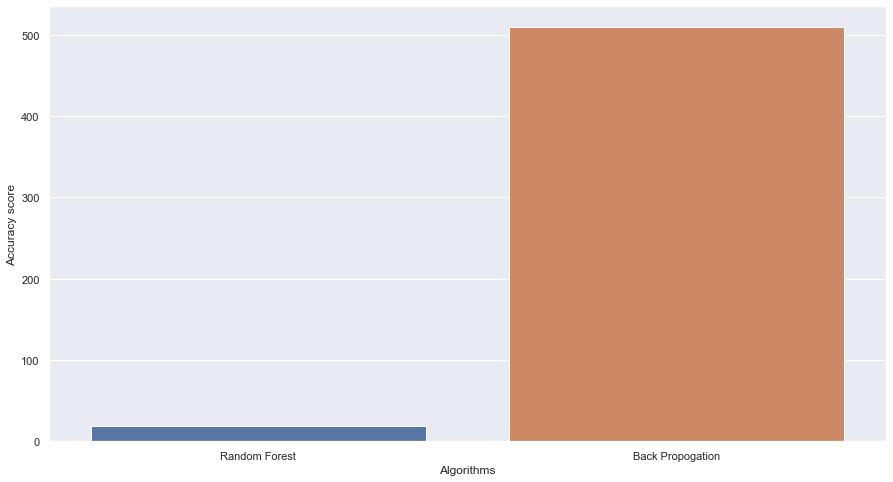

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [ ]:
State_Name = float(input('enter State_Name:'))
District_Name = float(input('enter District_Name:'))
Crop_Year = float(input('enter Crop_Year:')) 
Season = float(input('enter Season:'))
Crop = float(input('enter Crop'))
Temperature = float(input('enter Temperature:'))
humidity = float(input('enter humidity:')) 
soil_moisture = float(input('enter soil_moisture:'))
area = float(input('enter area:'))

p_n = clf.predict([[State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil_moisture,area]])
print('Production:',p_n[0])

enter State_Name:1
enter District_Name:1
enter Crop_Year:2021
enter Season:1
enter Crop1
enter Temperature:35


# Fertilizer prediction

In [2]:
data_1 = pd.read_csv('fertilizer.csv')

In [3]:
data_1

,n,p,k,amt of n,amt of p,amt of k
0,3,5,6,64,50,60
1,1,4,2,40,46,30
2,5,1,5,93,16,32
3,3,1,3,63,20,39
4,4,6,6,87,37,39
...,...,...,...,...,...,...
3235,1,4,2,40,46,30
3236,5,1,5,93,16,32
3237,3,1,3,63,20,39
3238,4,6,6,87,37,39


In [4]:
n = data_1.iloc[:,0:1]
p = data_1.iloc[:,1:2]
k = data_1.iloc[:,2:3]
amt_n = data_1.iloc[:,3:4]
amt_p = data_1.iloc[:,4:5]
amt_k = data_1.iloc[:,5:6]

In [5]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_n_train , X_n_test , y_n_train , y_n_test = train_test_split(n,amt_n,test_size=0.2,random_state=100)

In [6]:
X_p_train , X_p_test , y_p_train , y_p_test = train_test_split(p,amt_p,test_size=0.2,random_state=100)

In [7]:
X_k_train , X_k_test , y_k_train , y_k_test = train_test_split(k,amt_k,test_size=0.2,random_state=100)

In [8]:
from sklearn.neural_network import MLPRegressor
clf_n = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_n.fit(X_n_train, y_n_train)
y_n_pred = clf_n.predict(X_n_test)
clf_n.score(y_n_test,y_n_pred)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-2742.505238290881

In [9]:
clf_p = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_p.fit(X_p_train, y_p_train)
y_p_pred = clf_n.predict(X_p_test)
clf_p.score(y_p_test,y_p_pred)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-26.664247741735245

In [10]:
clf_k = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_k.fit(X_k_train, y_k_train)
y_k_pred = clf_n.predict(X_k_test)
clf_k.score(y_k_test,y_k_pred)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


-7.982635771390013

In [14]:
n_i = int(input('enter nitrogen:'))
p_i = int(input('enter phosphorus:'))
k_i = int(input('enter Potassium:'))
p_n = clf_n.predict([[n_i]])
p_p = clf_p.predict([[p_i]])
p_k = clf_k.predict([[k_i]])
print('Amount of nitrogen Fertilizer:',p_n[0])
print('Amount of phosphorus Fertilizer:',p_p[0])
print('Amount of Potassium Fertilizer:',p_k[0])

enter nitrogen:5
enter posporus:1
enter pottasium:4
Amount of nitrogen Fertizer: 94.22616724224173
Amount of posporus Fertizer: 19.988896701983244
Amount of pottasium Fertizer: 39.119515332548616


In [15]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Crop Yield Prediction System')
root.geometry('850x650')
root.configure(background="RosyBrown1")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="RosyBrown1")
var.set('Crop Yield Prediction System')
label.grid(row=0,columnspan=6)



label_1 = ttk.Label(root, text ='state',font=("Helvetica", 16),background="RosyBrown1")
label_1.grid(row=11,column=0)
    
#Entry_1= Entry(root)
#Entry_1.grid(row=11,column=1)

options_state = StringVar(root)
options_state.set("Select Option") # default value
    
    
om1 = ttk.OptionMenu(root, options_state,'Andaman and Nicobar Islands','Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh')
om1.grid(row=11, column=1) 


label_2 = ttk.Label(root, text ='district',font=("Helvetica", 16),background="RosyBrown1")
label_2.grid(row=12,column=0)
    
#Entry_2 = Entry(root)
#Entry_2.grid(row=12,column=1)
    
options_city = StringVar(root)
options_city.set("Select Option") # default value
    
om1 = ttk.OptionMenu(root, options_city, 'NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL')
om1.grid(row=12, column=1) 
    
label_3 = ttk.Label(root, text ='year',font=("Helvetica", 16),background="RosyBrown1")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)

label_4 = ttk.Label(root, text ='season',font=("Helvetica", 16),background="RosyBrown1")
label_4.grid(row=14,column=0)
    
Entry_4= Entry(root)
Entry_4.grid(row=14,column=1)

label_5 = ttk.Label(root, text ='crop',font=("Helvetica", 16),background="RosyBrown1")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)
    
    
label_6 = ttk.Label(root, text ='Temperature',font=("Helvetica", 16),background="RosyBrown1")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)

label_7 = ttk.Label(root, text ='humidity',font=("Helvetica", 16),background="RosyBrown1")
label_7.grid(row=17,column=0)
    
Entry_7= Entry(root)
Entry_7.grid(row=17,column=1)

label_8 = ttk.Label(root, text ='soilmoisture',font=("Helvetica", 16),background="RosyBrown1")
label_8.grid(row=18,column=0)

Entry_8 = Entry(root)
Entry_8.grid(row=18,column=1)
    
    
label_9 = ttk.Label(root, text ='area',font=("Helvetica", 16),background="RosyBrown1")
label_9.grid(row=19,column=0)
    
Entry_9 = Entry(root)
Entry_9.grid(row=19,column=1)


def predict():
    state = options_state.get()#Entry_1.get()
    if state == 'Andaman and Nicobar Islands':
        state = 0
    elif state == 'Andhra Pradesh':
        state = 1
    elif state == 'Arunachal Pradesh':
        state = 2
    elif state == 'Assam':
        state = 3
    elif state == 'Bihar':
        state = 4
    elif state == 'Chandigarh':
        state = 5
    elif state == 'Chhattisgarh':
        state = 6
    district = options_city.get()
    if district == 'NICOBARS':
        district = 0
    elif district == 'NORTH AND MIDDLE ANDAMAN':
        district = 1
    elif district == 'SOUTH ANDAMANS':
        district = 2
    elif district == 'ANANTAPUR':
        district = 3
    elif district == 'CHITTOOR':
        district = 4
    elif district =='EAST GODAVARI':
        district = 5
    elif district == 'GUNTUR':
        district = 6
    elif district == 'KADAPA':
        district = 7
    elif district == 'KRISHNA':
        district = 8
    elif district == 'KURNOOL':
        district = 9
    
    print(state,district)
    year = Entry_3.get()
    season = Entry_4.get()
    crop = Entry_5.get()
    Temperature = Entry_6.get()
    humidity = Entry_7.get()
    soilmoisture = Entry_8.get()
    area = Entry_9.get()
    out = forest.predict([[float(state),
       float(district),
       float(year),
       float(season),
       float(crop),
       float(Temperature),
       float(humidity),
       float(soilmoisture),
       float(area)]])
    
    output.delete(0,END)
    output.insert(0,out[0])
b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="RosyBrown1",command = predict)
b1.grid(row=20,column=0)
    

output = Entry(root)
output.grid(row=20,column=1)
    
root.mainloop()

In [ ]:
# from tkinter import *
from tkinter import ttk

root = Tk()
root.title('fertilizer Prediction System')
root.geometry('850x650')
root.configure(background="RosyBrown1")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="RosyBrown1")
var.set('fertilizer Prediction System')
label.grid(row=0,columnspan=6)



label_1 = ttk.Label(root, text ='nitrogen',font=("Helvetica", 16),background="RosyBrown1")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)

label_2 = ttk.Label(root, text ='phosphorus',font=("Helvetica", 16),background="RosyBrown1")
label_2.grid(row=12,column=0)
    
Entry_2 = Entry(root)
Entry_2.grid(row=12,column=1)
    
    
label_3 = ttk.Label(root, text ='pottasium',font=("Helvetica", 16),background="RosyBrown1")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)




def predict():
    n_i = Entry_1.get()
    p_i = Entry_2.get()
    k_i = Entry_3.get()

    p_n = clf_n.predict([[float(n_i)]])
    p_p = clf_p.predict([[float(p_i)]])
    p_k = clf_k.predict([[float(k_i)]])
    print('Amount of nitrogen Fertilizer required:',p_n)
    print('Amount of phosphorus Fertilizer required:',p_p)
    print('Amount of nitrogen Fertilizer required:',p_k)
    
    s = """Amount of nitrogen Fertilizer required:{}\nAmount of phosphorus Fertilizer required:{}\nAmount of nitrogen Fertilizer required:{}""".format(p_n[0],p_p[0],p_k[0])
    
    
    if p_n[0] < 50 and p_p < 30 and p_k < 40 :
        print('DIAMMONIUM PHOSPHATE fertilizer')
        s = 'DIAMMONIUM PHOSPHATE fertilizer'
    elif p_n[0] < 100 and p_p < 30 and p_k < 40  :
        print('NPK')
        s = 'NPK'
    elif p_n[0] < 150 and p_p < 50 and p_k < 40  :
        print('Potassium nitrate')
        s = 'Potassium nitrate'
    elif p_n[0] < 50 and p_p < 30 and p_k < 40  :
        print('sea weed fertilizer')
        s = 'sea weed fertilizer'
    else:
        print('fish emulation fertilizer')
        s = 'fish emulation fertilizer'
        
    output.delete('1.0',END)
    output.insert('1.0',s)
   

b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="RosyBrown1",command = predict)
b1.grid(row=20,column=0)
    

output = Text(root)
output.grid(row=20,column=1)
    
root.mainloop()


: 